<a href="https://colab.research.google.com/github/plaban1981/Deep-Learning-KERAS/blob/master/Age_Category_Classification_using_Tensorflow_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive on Colab as the images are stored in the drive

In [84]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing - eye images

In [85]:
import pandas as pd
import os
train = pd.read_csv("/content/drive/MyDrive/Qualcom/train.csv",usecols=['filename','age'])
train.shape

(6508, 2)

In [86]:
train.head()

,filename,age
0,0.jpg,26
1,1.jpg,2
2,2.jpg,32
3,3.jpg,20
4,4.jpg,25


In [3]:
train.age.value_counts()

26     719
25     498
32     288
22     242
50     233
40     231
21     214
29     212
36     204
16     167
20     158
4      154
2      153
38     151
52     135
27     134
3      133
39     124
15     113
28     113
10     110
47     109
56     108
48     106
55     105
58     101
34     100
5       95
37      91
14      91
60      90
23      89
49      89
51      82
12      76
17      73
46      72
65      71
33      70
13      48
11      41
62      40
59      40
57      39
24      38
61      32
41      31
63      29
66      22
67      16
64      14
100      6
31       2
116      2
110      1
115      1
105      1
101      1
Name: age, dtype: int64

In [87]:
test = pd.read_csv("/content/drive/MyDrive/Qualcom/test.csv",usecols=['filename','age'])
test.head()

,filename,age
0,0.jpg,17
1,1.jpg,48
2,2.jpg,51
3,3.jpg,51
4,4.jpg,47


## Unzip files

In [8]:
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("/content/drive/MyDrive/Qualcom/Eye Dataset Final.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(path="/content/drive/MyDrive/Qualcom")

In [26]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 16 kB/s 
     |████████████████████████████████| 5.8 MB 4.3 MB/s 
     |████████████████████████████████| 1.4 MB 58.7 MB/s 
     |████████████████████████████████| 462 kB 76.5 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


## Reproducability

In [88]:
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
tf.__version__

'2.9.2'

In [90]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

## Data Augmentation

In [91]:
TRAIN_DIR = "/content/drive/MyDrive/Qualcom/train"
TEST_DIR = "/content/drive/MyDrive/Qualcom/test"

In [92]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [108]:
batch_size = 8
image_size = (128,128)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="age",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="other",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=TRAIN_DIR,
    x_col="filename",
    y_col="age",
    target_size=image_size,
    batch_size=batch_size,
    class_mode="other",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=TEST_DIR,
    x_col="filename",
    target_size=image_size,
    batch_size=1,
    class_mode=None,
    shuffle=False,
)

Found 5207 validated image filenames.
Found 1301 validated image filenames.
Found 1628 validated image filenames.


## Some ImageDataGenerator properities

In [117]:
print(train_generator.class_mode)

input


In [118]:
print(valid_generator.class_indices)

AttributeError: ignored

In [ ]:
print(train_generator.samples)

2240


In [ ]:
print(valid_generator.samples)

560


In [ ]:
type(train_generator)

keras.preprocessing.image.DataFrameIterator

In [ ]:
len(train_generator.labels)

2240

In [ ]:
train_generator.filenames[:5]

['12_0_0_20170110225028524_resized.jpg',
 '39_0_1_20170116011220421_resized.jpg',
 '25_0_3_20170119153857705_resized.jpg',
 '3_0_1_20170110213455106_resized.jpg',
 '39_1_4_20170104204507323_resized.jpg']

In [ ]:
train_generator.filepaths[:5]

['/content/drive/MyDrive/Qualcom/Eye_Train_Images/12_0_0_20170110225028524_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_0_1_20170116011220421_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/25_0_3_20170119153857705_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/3_0_1_20170110213455106_resized.jpg',
 '/content/drive/MyDrive/Qualcom/Eye_Train_Images/39_1_4_20170104204507323_resized.jpg']

In [63]:
valid_generator.filepaths[:5]

['/content/drive/MyDrive/Qualcom/train/0.jpg',
 '/content/drive/MyDrive/Qualcom/train/1.jpg',
 '/content/drive/MyDrive/Qualcom/train/2.jpg',
 '/content/drive/MyDrive/Qualcom/train/3.jpg',
 '/content/drive/MyDrive/Qualcom/train/4.jpg']

In [ ]:
len(valid_generator.labels)

560

## Retrieve true values from validation dataset

In [ ]:
y_val = valid_generator.labels

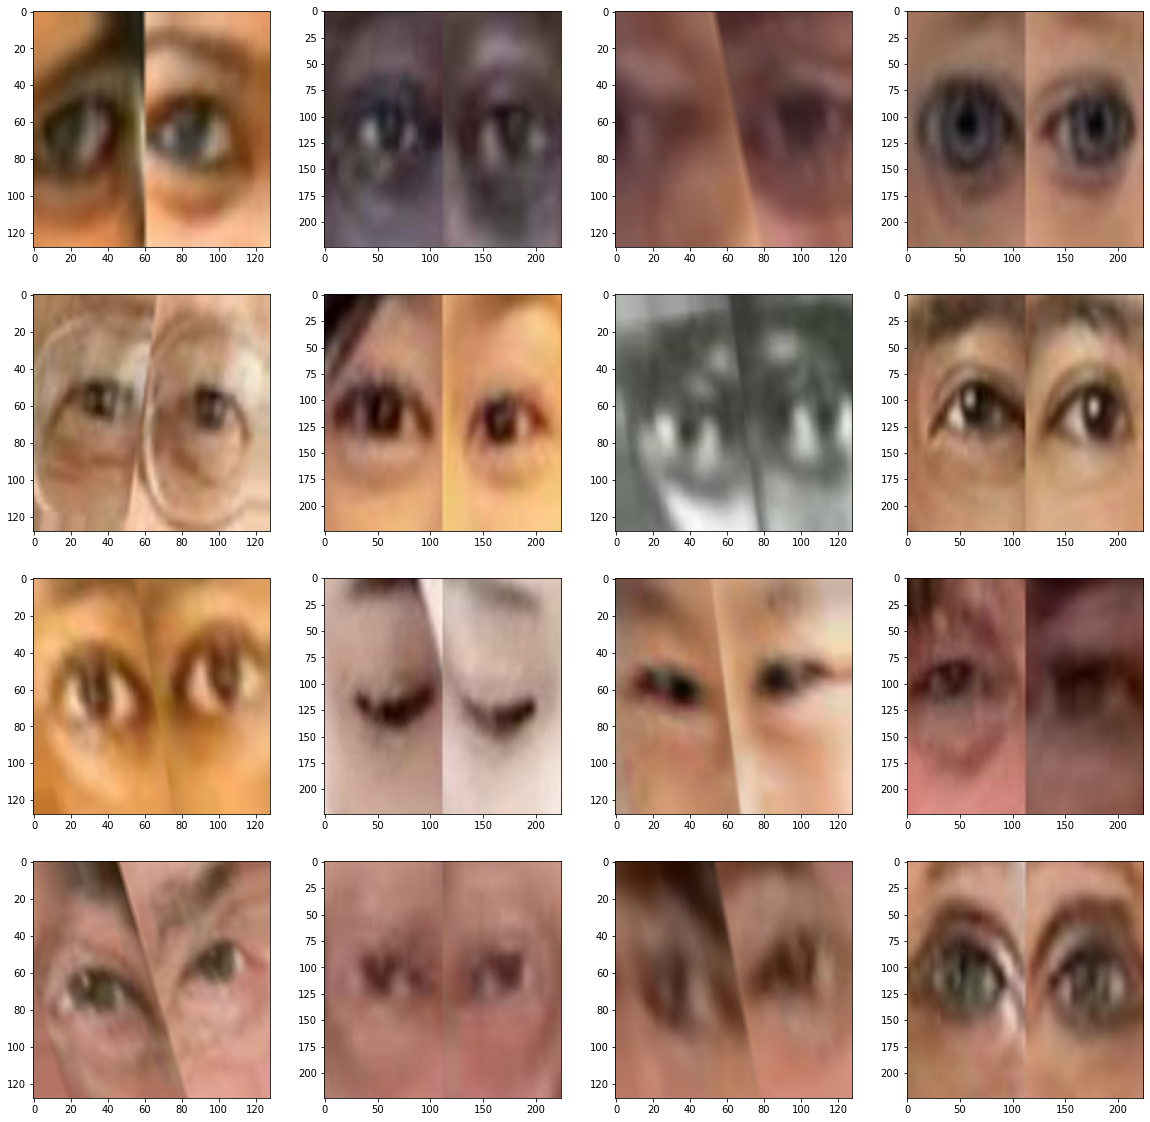

In [25]:
from skimage import io
import matplotlib.pyplot as plt
for i in range(3):
    x1,y1 = next(train_generator)
    y1_int = np.argmax(y1,axis=-1)
 
#Plot the batch images w.r.t. the dataset images.
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(128,128,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(train_generator.directory,train_generator.filenames[(train_generator.batch_index-1)*32+i])))
    idx+=1

## Training Model From Scratch

In [94]:
from tensorflow.keras.applications import VGG16,VGG19,NASNetLarge,DenseNet201,ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import Sequence

# Transfer Learning

## Define pretrained Base

In [95]:
pretrained_base = DenseNet201(input_shape=(224,224,3), include_top=False, pooling='max',weights='imagenet')

In [96]:
pretrained_base.trainable = False

## Attach Head

In [97]:
from tensorflow.keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [98]:
model = Sequential([
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)])

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten_7 (Flatten)         (None, 1920)              0         
                                                                 
 dense_26 (Dense)            (None, 256)               491776    
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,912,577
Trainable params: 590,593
Non

## Compile the model

 metrics=[tf.keras.metrics.MeanSquaredError()]

In [118]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=[tf.keras.metrics.MeanSquaredError()])

In [ ]:
model.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])

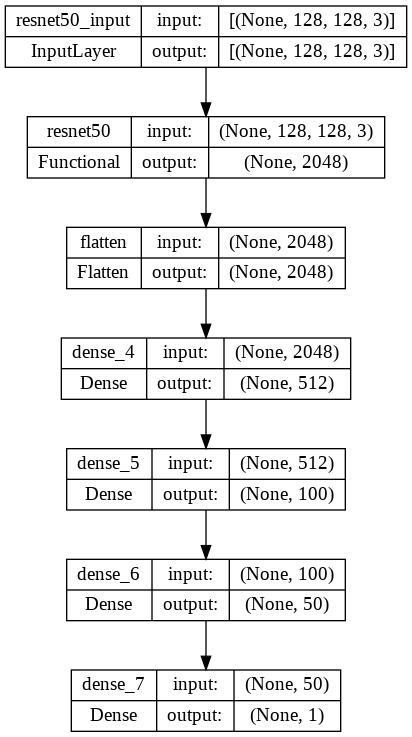

In [24]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

## Defiing callbacks

## Arguments

* monitor: quantity to be monitored.
* factor: factor by which the learning rate will be reduced. new_lr = lr * factor.
* patience: number of epochs with no improvement after which learning rate will be reduced.
* verbose: int. 0: quiet, 1: update messages.
* mode: one of {'auto', 'min', 'max'}. In 'min' mode, the learning rate will be reduced when the quantity monitored has stopped decreasing; in 'max' mode it will be reduced when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.
* min_delta: threshold for measuring the new optimum, to only focus on significant changes.
* cooldown: number of epochs to wait before resuming normal operation after lr has been reduced.
* min_lr: lower bound on the learning rate.

In [25]:
folderpath = "/content/drive/MyDrive/Qualcom/Model/"
filepath = folderpath + "transfer_epoch:{epoch:02d}-val_loss:{val_loss:.2f}.hdf5"

In [22]:
cbs = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1,mode='auto', min_lr=1e-5, verbose=1),
      tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=5, verbose=1, mode='auto'),
      ]

* https://keras.io/api/callbacks/model_checkpoint/
* https://keras.io/api/callbacks/reduce_lr_on_plateau/
* https://keras.io/api/callbacks/early_stopping/

## Train the Model

In [39]:
train_generator.n // train_generator.batch_size

650

In [40]:
valid_generator.n//valid_generator.batch_size

162

In [119]:
batch_size = 8
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=5,
                    )

Epoch 1/5
650/650 [==============================] - 82s 108ms/step - loss: 151.8587 - mean_squared_error: 151.8587 - val_loss: 185.8132 - val_mean_squared_error: 185.8132
Epoch 2/5
650/650 [==============================] - 67s 103ms/step - loss: 149.6549 - mean_squared_error: 149.6549 - val_loss: 196.3559 - val_mean_squared_error: 196.3559
Epoch 3/5
650/650 [==============================] - 66s 102ms/step - loss: 145.7438 - mean_squared_error: 145.7438 - val_loss: 134.3647 - val_mean_squared_error: 134.3647
Epoch 4/5
650/650 [==============================] - 66s 102ms/step - loss: 139.2576 - mean_squared_error: 139.2576 - val_loss: 148.3274 - val_mean_squared_error: 148.3274
Epoch 5/5
650/650 [==============================] - 66s 102ms/step - loss: 137.6587 - mean_squared_error: 137.6587 - val_loss: 132.4236 - val_mean_squared_error: 132.4236


## Evaluate on the validation data

In [111]:
preds = model.predict(valid_generator)

163/163 [==============================] - 17s 85ms/step


In [112]:
predictions = np.ravel(preds)

In [113]:
predictions

array([21.002834, 39.73344 , 42.95343 , ..., 35.05433 , 40.41199 ,
       49.070065], dtype=float32)

In [114]:
predictions = np.round(predictions)

In [116]:
predictions = predictions.astype(int)

In [120]:
batch_size = 8
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=50,
                    callbacks=cbs,
                    )

Epoch 1/50
650/650 [==============================] - 68s 105ms/step - loss: 130.7413 - mean_squared_error: 130.7413 - val_loss: 144.3654 - val_mean_squared_error: 144.3654 - lr: 0.0010
Epoch 2/50
650/650 [==============================] - ETA: 0s - loss: 131.7853 - mean_squared_error: 131.7853
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
650/650 [==============================] - 69s 107ms/step - loss: 131.7853 - mean_squared_error: 131.7853 - val_loss: 146.7647 - val_mean_squared_error: 146.7647 - lr: 0.0010
Epoch 3/50
650/650 [==============================] - 67s 104ms/step - loss: 121.0951 - mean_squared_error: 121.0951 - val_loss: 138.0943 - val_mean_squared_error: 138.0943 - lr: 5.0000e-04
Epoch 4/50
650/650 [==============================] - 67s 102ms/step - loss: 115.8851 - mean_squared_error: 115.8851 - val_loss: 130.0856 - val_mean_squared_error: 130.0856 - lr: 5.0000e-04
Epoch 5/50
650/650 [==============================] - ETA: 0s - loss: 115

## Save the model

In [121]:
model.save("/content/drive/MyDrive/Qualcom/Model/AgeDensenet201.hdf5")

## Examine the loss and accuracy

In [124]:
import matplotlib.pyplot as plt

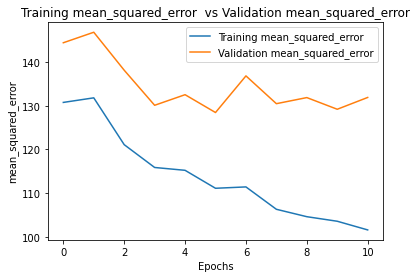

In [125]:
plt.plot(history.history['mean_squared_error'],label='Training mean_squared_error')
plt.plot(history.history['val_mean_squared_error'],label='Validation mean_squared_error')
plt.legend()
plt.title('Training mean_squared_error  vs Validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('mean_squared_error')
plt.show()

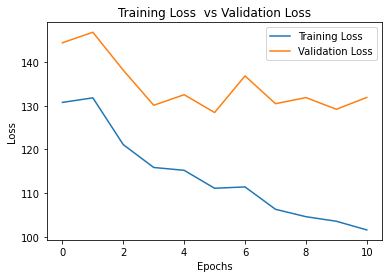

In [126]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Training Loss  vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Evaluate the Model by loading the best model

In [127]:
chekpoint_filepath = "/content/drive/MyDrive/Qualcom/Model/AgeDensenet201.hdf5"

In [128]:
from tensorflow.keras.models import load_model
loaded_model = load_model(chekpoint_filepath)

In [130]:
preds = loaded_model.predict(test_generator)

1628/1628 [==============================] - 44s 25ms/step


In [131]:
predictions = np.ravel(preds)

In [132]:
predictions = np.round(predictions )

In [133]:
predictions = predictions.astype(int)

In [134]:
predictions

array([24, 39, 43, ..., 50, 21, 29])

In [68]:
test

,filename,age
0,0.jpg,17
1,1.jpg,48
2,2.jpg,51
3,3.jpg,51
4,4.jpg,47
...,...,...
1623,1623.jpg,21
1624,1624.jpg,49
1625,1625.jpg,56
1626,1626.jpg,22


In [135]:
y_val =test['age'].values

In [136]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_val,predictions)))

11.683847183709869


In [137]:
def regression_accuracy(y_meas, y_pred, max_error=5, error_type='relative'):
    '''Compares predicted & measured values, returning the percentage of predictions
       that are within a set error limit. This error limit can be an absolute value
       or a relative percentage'''

    # OPTION 1: Relative percentage
    if ( error_type == 'relative' ):
        mask = 100.0 * abs((y_pred - y_meas) / y_meas) < max_error

    # OPTION 2: Absolute value
    if ( error_type == 'absolute' ):
        mask = abs(y_pred - y_meas) < max_error

    accuracy = sum(mask) / len(mask)

    return accuracy

In [138]:
regression_accuracy(y_val, predictions)

0.128992628992629

In [140]:
regression_accuracy(y_val, predictions,20)

0.4416461916461916

## Make inference on the test data

In [ ]:
test_data_predictions  = loaded_model.predict(test_generator)

In [ ]:
test_predictions = np.argmax(test_data_predictions,axis=1)

In [ ]:
file_names = test_generator.filenames

## Prepare Submission File

In [ ]:
import pandas as pd
df_submission = pd.DataFrame({"filename":file_names,"predictions":test_predictions})

In [ ]:
df_submission.head()

,filename,predictions
0,25_1_3_20170117152000516_resized.jpg,1
1,64_0_2_20170116193321184_resized.jpg,0
2,5_0_0_20170110220356210_resized.jpg,0
3,59_0_0_20170109012750162_resized.jpg,0
4,26_0_0_20170113210127277_resized.jpg,0


In [ ]:
train_generator.class_indices

{'0': 0, '1': 1}

In [ ]:
label_dict = {v:k for k,v in train_generator.class_indices.items()}
label_dict

{0: '0', 1: '1'}

In [ ]:
df_submission['predictions'] = df_submission['predictions'].map(label_dict)

In [ ]:
df_submission.head()

,filename,predictions
0,25_1_3_20170117152000516_resized.jpg,1
1,64_0_2_20170116193321184_resized.jpg,0
2,5_0_0_20170110220356210_resized.jpg,0
3,59_0_0_20170109012750162_resized.jpg,0
4,26_0_0_20170113210127277_resized.jpg,0
